In [ ]:
# 01_data_loading:

import pandas as pd
import os

# Correct absolute path
file_path = 'C:/Users/Karth/Downloads/Sample - Superstore.csv'

# Validate path
if not os.path.exists(file_path):
    print(" File not found. Check the path:", file_path)
else:
    # Load dataset
    df = pd.read_csv(file_path, encoding='ISO-8859-1')

    # Output basic information
    print("✅ File loaded successfully!\n")
    print("✅ Shape of dataset:", df.shape)
    print("\n✅ Dataset Info:")
    print(df.info())
    print("\n✅ First 5 rows:")
    print(df.head())
    print("\n✅ Summary Statistics:")
    print(df.describe(include='all'))

✅ File loaded successfully!

✅ Shape of dataset: (9994, 21)

✅ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994

In [ ]:
# 02_data_cleaning:

import pandas as pd

# Load dataset
file_path = 'C:/Users/Karth/Downloads/Sample - Superstore.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# 1. Convert Date Columns 
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# 2. Check for Missing Values
print("\n✅ Missing Values:")
print(df.isnull().sum())

# 3. Remove Duplicates 
initial_shape = df.shape
df.drop_duplicates(inplace=True)
print(f"\n🧾 Duplicates removed: {initial_shape[0] - df.shape[0]}")

# 4. Check for Irrelevant Columns 
irrelevant_cols = ['Row ID', 'Country']  # Country is always 'United States'
df.drop(columns=irrelevant_cols, inplace=True)
print(f"\n✅ Columns dropped: {irrelevant_cols}")

# 5. Basic Outlier Insight (not removal) 
print("\n✅ Checking for extreme outliers in 'Sales' and 'Profit':")
print(df[['Sales', 'Profit']].describe())

# 6. Final Overview 
print("\n✅ Cleaning Done.")
print("✅ Final Dataset Shape:", df.shape)
print("✅ Columns:", df.columns.tolist())

# 7. Check Unique Values Per Column 
def check_columns(data):
    """
    Print number of unique values for each column
    """
    print("\n✅ Unique Values per Column:")
    for column in data.columns:
        print(f"- {column}: {data[column].nunique()} unique values")

check_columns(df)

# 8. Save Cleaned Data 
# Save cleaned dataset to the project folder
df.to_csv('C:/GUVI DS/superstore_project/cleaned_superstore_data.csv', index=False)
print("\n✅ Cleaned data saved to 'C:/GUVI DS/superstore_project/cleaned_superstore_data.csv'")


✅ Missing Values:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

🧾 Duplicates removed: 0

✅ Columns dropped: ['Row ID', 'Country']

✅ Checking for extreme outliers in 'Sales' and 'Profit':
              Sales       Profit
count   9994.000000  9994.000000
mean     229.858001    28.656896
std      623.245101   234.260108
min        0.444000 -6599.978000
25%       17.280000     1.728750
50%       54.490000     8.666500
75%      209.940000    29.364000
max    22638.480000  8399.976000

✅ Cleaning Done.
✅ Final Dataset Shape: (9994, 19)
✅ Columns: ['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',


=== BASIC DATASET INFO ===
Shape: (9994, 19) (rows, columns)

Columns: ['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']

Data types:
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

=== COLUMN ANALYSIS ===

Categorical columns (12):
- 

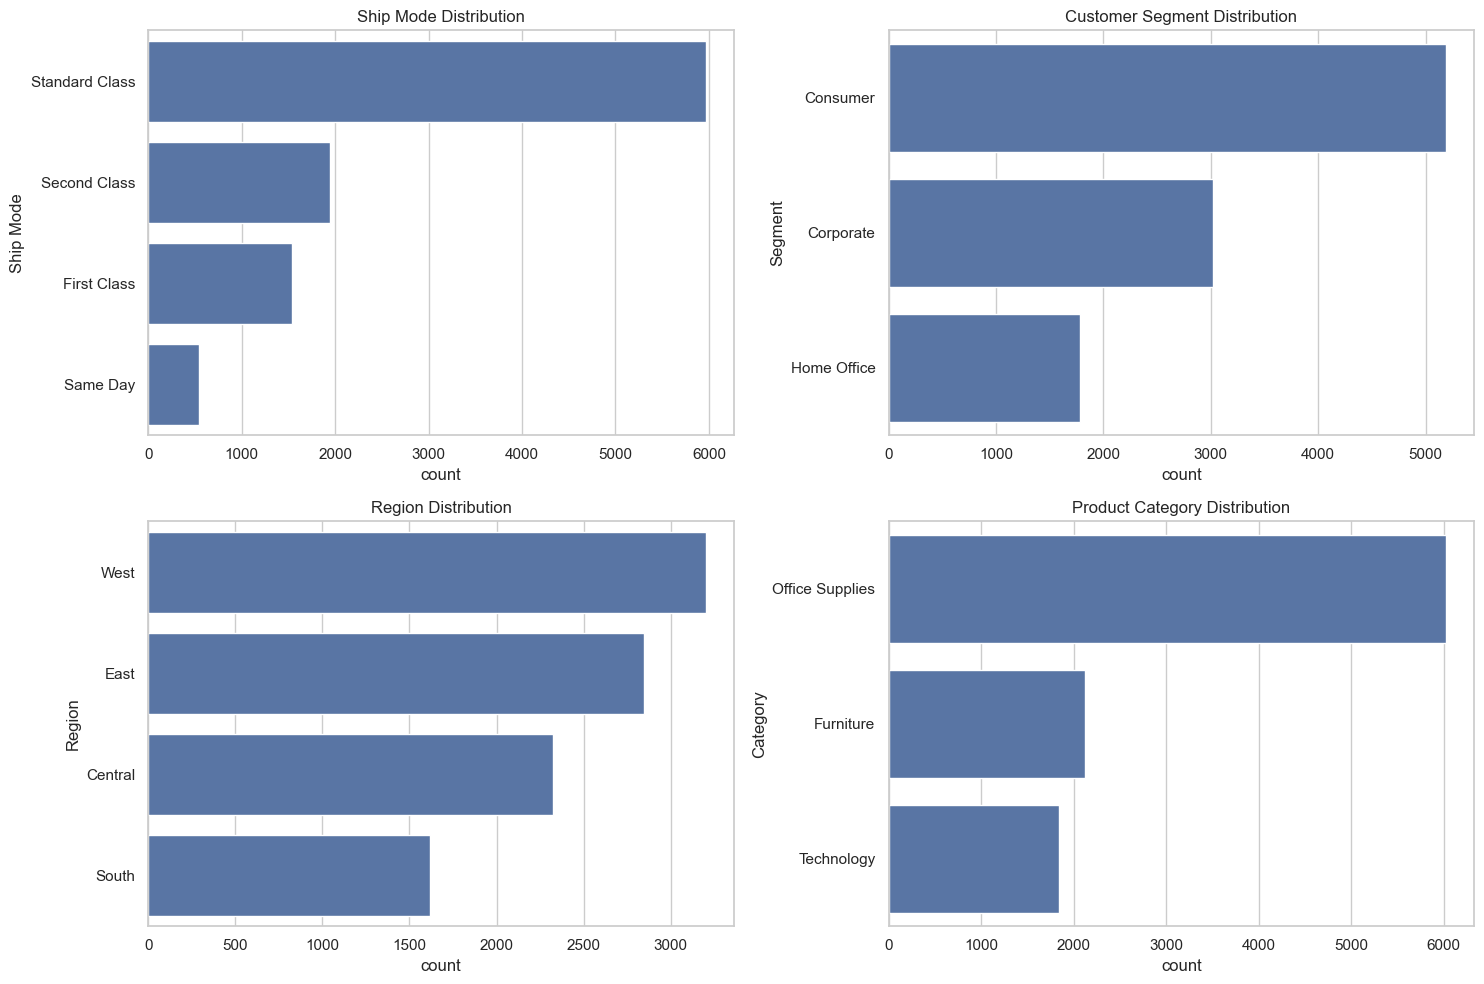

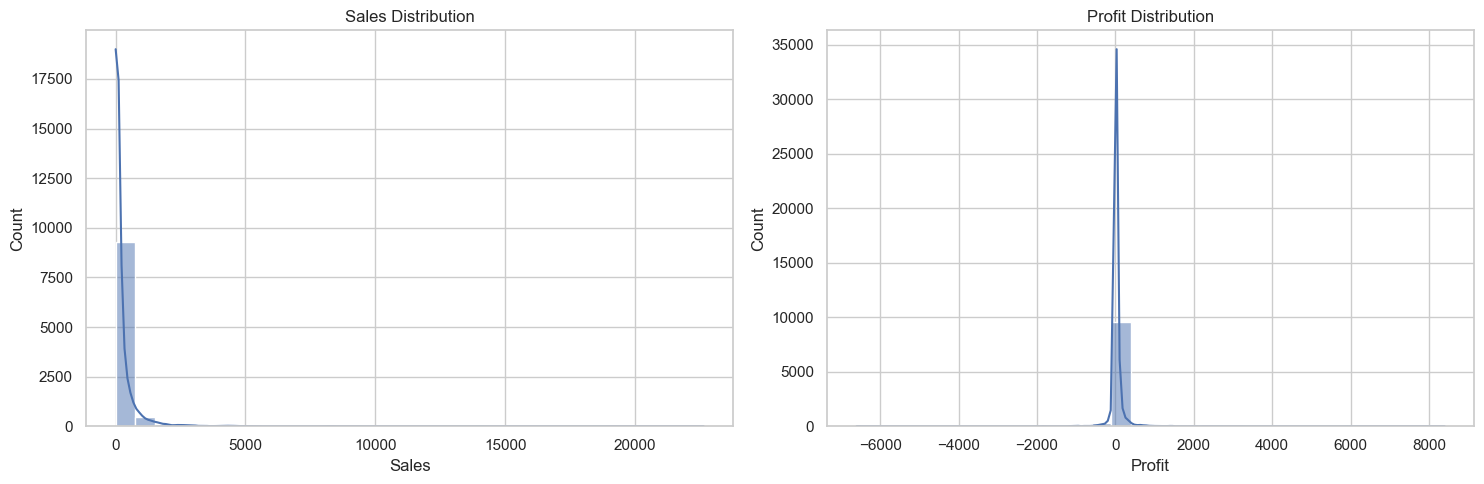


=== KEY INITIAL FINDINGS ===
1. Dataset contains 9994 rows and 19 columns
2. Main categorical dimensions: Ship Mode, Segment, Region, Category
3. Numerical metrics: Sales (mean $229.86), Profit (mean $28.66)
4. Time range: Orders from 2014-01-03 to 2017-12-30


In [ ]:
# 03_data_understanding
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic Dataset Examination
print("\n=== BASIC DATASET INFO ===")
print(f"Shape: {df.shape} (rows, columns)")
print(f"\nColumns: {list(df.columns)}")
print(f"\nData types:\n{df.dtypes}")

# 2. Column-wise Analysis 
print("\n=== COLUMN ANALYSIS ===")

# Categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"\nCategorical columns ({len(cat_cols)}):")
for col in cat_cols:
    print(f"- {col}: {df[col].nunique()} unique values")

# Numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"\nNumerical columns ({len(num_cols)}):")
print(df[num_cols].describe())

# Date columns
date_cols = df.select_dtypes(include=['datetime64']).columns
print(f"\nDate columns ({len(date_cols)}):")
for col in date_cols:
    print(f"- {col}: Range from {df[col].min()} to {df[col].max()}")

# 3. Value Counts for Key Categorical Columns 
print("\n=== VALUE COUNTS ===")
for col in ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']:
    print(f"\n{col} distribution:")
    print(df[col].value_counts().head(10))  # Top 10 values

# 4. Simple Initial Visualizations
print("\nGenerating basic visualizations...")

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# 4.1 Categorical columns
plt.subplot(2, 2, 1)
sns.countplot(data=df, y='Ship Mode', order=df['Ship Mode'].value_counts().index)
plt.title('Ship Mode Distribution')

plt.subplot(2, 2, 2)
sns.countplot(data=df, y='Segment', order=df['Segment'].value_counts().index)
plt.title('Customer Segment Distribution')

plt.subplot(2, 2, 3)
sns.countplot(data=df, y='Region', order=df['Region'].value_counts().index)
plt.title('Region Distribution')

plt.subplot(2, 2, 4)
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index)
plt.title('Product Category Distribution')

plt.tight_layout()
plt.show()

# 4.2 Numerical distributions
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Profit'], bins=30, kde=True)
plt.title('Profit Distribution')

plt.tight_layout()
plt.show()

# 5. Save Key Findings
print("\n=== KEY INITIAL FINDINGS ===")
print("1. Dataset contains {} rows and {} columns".format(*df.shape))
print("2. Main categorical dimensions: Ship Mode, Segment, Region, Category")
print("3. Numerical metrics: Sales (mean ${:.2f}), Profit (mean ${:.2f})".format(
    df['Sales'].mean(), df['Profit'].mean()))
print("4. Time range: Orders from {} to {}".format(
    df['Order Date'].min().strftime('%Y-%m-%d'),
    df['Order Date'].max().strftime('%Y-%m-%d')))

In [ ]:
# 04_geo_analysis

import pandas as pd
import plotly.express as px
import os
# Utility Functions

def load_data(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")
    df = pd.read_csv(file_path)

    # Map full state names to abbreviations (including DC)
    state_abbrev = {
        'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
        'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
        'District of Columbia': 'DC',  # Added this line to fix the error
        'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
        'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
        'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
        'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
        'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
        'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
        'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
        'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
        'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
        'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
        'Wisconsin': 'WI', 'Wyoming': 'WY'
    }

    df['State_abb'] = df['State'].map(state_abbrev)

    # Check for any unmapped states
    if df['State_abb'].isnull().any():
        missing_states = df.loc[df['State_abb'].isnull(), 'State'].unique()
        raise ValueError(f"Some states could not be mapped to abbreviations: {missing_states}")

    return df

def prepare_choropleth_data(df, value_col):
    df_grouped = df.groupby('State_abb')[[value_col]].sum().reset_index()
    return df_grouped

def plot_choropleth(df, value_col, title):
    fig = px.choropleth(
        df,
        locations='State_abb',
        locationmode='USA-states',
        color=value_col,
        scope='usa',
        color_continuous_scale='Viridis',
        title=title
    )
    fig.show()

def prepare_scattergeo_data(df, category_col):
    df_grouped = df.groupby(['State', 'State_abb'])[category_col].value_counts().unstack(fill_value=0).reset_index()
    return df_grouped

def plot_scattergeo(df, category_col):
    for col in df.columns[2:]:
        fig = px.scatter_geo(
            df,
            locations="State_abb",
            locationmode='USA-states',
            size=col,
            scope='usa',
            color_discrete_sequence=["indianred"],
            title=f"{category_col} - {col} Distribution Across States"
        )
        fig.show()

# Main Execution

def main():
    # Load preprocessed dataset with State and State_abb
    df = load_data("cleaned_superstore_data.csv")

    # Choropleth Maps
    for metric in ['Sales', 'Profit']:
        choropleth_data = prepare_choropleth_data(df, metric)
        plot_choropleth(choropleth_data, metric, f"{metric} by State")

    # Scattergeo Maps
    categorical_features = ['Ship Mode', 'Segment', 'Category', 'Sub-Category']
    for cat_feature in categorical_features:
        scatter_data = prepare_scattergeo_data(df, cat_feature)
        plot_scattergeo(scatter_data, cat_feature)

if __name__ == "__main__":
    main()

In [ ]:
# 0.5_Customer_analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Define custom color palette
colors = ['#1192AA', '#00B8C0', '#73D4D3', '#FF69B4']

# Load cleaned dataset
data = pd.read_csv('cleaned_superstore_data.csv')

# Plot Pareto chart 
def plot_pareto(df, group_col, value_col, title):
    sales_grouped = df[[group_col, value_col]].groupby(group_col).sum()
    sales_grouped = sales_grouped.sort_values(by=value_col, ascending=False)
    sales_grouped['cumperc'] = sales_grouped[value_col].cumsum() / sales_grouped[value_col].sum() * 100

    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(go.Bar(x=sales_grouped.index, y=sales_grouped[value_col], name="Sum", marker_color=colors[0]))
    fig.add_trace(go.Scatter(x=sales_grouped.index, y=sales_grouped['cumperc'], name="Cumulative %", 
                             line=dict(color=colors[3], width=2)), secondary_y=True)
    
    fig.update_layout(
        title={'text': title, 'y': 0.95, 'x': 0.5},
        xaxis_title=group_col,
        font=dict(size=14),
        template='simple_white'
    )
    fig.update_yaxes(title_text=value_col, secondary_y=False)
    fig.update_yaxes(title_text="Cumulative Sum (%)", secondary_y=True)
    fig.show()

# Plot bar chart 
def plot_bar(df, group_col, value_col, title, color):
    grouped = df[[group_col, value_col]].groupby(group_col).agg('mean' if 'mean' in title.lower() else 'median')
    grouped = grouped.sort_values(by=value_col, ascending=False)

    fig = px.bar(x=grouped.index, y=grouped[value_col], template='simple_white', color_discrete_sequence=[color])
    fig.update_layout(
        title={'text': title, 'y': 0.95, 'x': 0.5},
        xaxis_title=group_col,
        yaxis_title=value_col,
        showlegend=False,
        font=dict(size=14)
    )
    fig.show()

# Plot boxplot 
def plot_box(df, x_col, y_col, title):
    fig = go.Figure(go.Box(x=df[x_col], y=df[y_col], notched=True, boxpoints=False, marker_color=colors[0]))
    fig.update_layout(
        title={'text': title, 'y': 0.95, 'x': 0.5},
        xaxis_title=x_col,
        yaxis_title=y_col,
        showlegend=False,
        font=dict(size=14),
        template='simple_white'
    )
    fig.show()

# Execution of Product Analysis Steps 

# 1. Pareto Charts - Sales by Category and Sub-Category
plot_pareto(data, 'Category', 'Sales', "Total Sales by Category Pareto Chart")
plot_pareto(data, 'Sub-Category', 'Sales', "Total Sales by Sub-Category Pareto Chart")

# 2. Median Sales by Category and Sub-Category
plot_bar(data, 'Category', 'Sales', "Median Sales by Category", colors[1])
plot_bar(data, 'Sub-Category', 'Sales', "Median Sales by Sub-Category", colors[1])

# 3. Mean Sales by Category and Sub-Category
plot_bar(data, 'Category', 'Sales', "Mean Sales by Category", colors[2])
plot_bar(data, 'Sub-Category', 'Sales', "Mean Sales by Sub-Category", colors[2])

# 4. Sales Boxplots by Category and Sub-Category
plot_box(data, 'Category', 'Sales', "Sales by Category Boxplot")
plot_box(data, 'Sub-Category', 'Sales', "Sales by Sub-Category Boxplot")

# 5. Total Profit by Category and Sub-Category (bar charts)
plot_bar(data, 'Category', 'Profit', "Total Profit by Category", colors[0])
plot_bar(data, 'Sub-Category', 'Profit', "Total Profit by Sub-Category", colors[0])

# 6. Median Profit by Category and Sub-Category
plot_bar(data, 'Category', 'Profit', "Median Profit by Category", colors[1])
plot_bar(data, 'Sub-Category', 'Profit', "Median Profit by Sub-Category", colors[1])

# 7. Mean Profit by Category and Sub-Category
plot_bar(data, 'Category', 'Profit', "Mean Profit by Category", colors[2])
plot_bar(data, 'Sub-Category', 'Profit', "Mean Profit by Sub-Category", colors[2])

# 8. Profit Boxplots by Category and Sub-Category
plot_box(data, 'Category', 'Profit', "Profit by Category Boxplot")
plot_box(data, 'Sub-Category', 'Profit', "Profit by Sub-Category Boxplot")

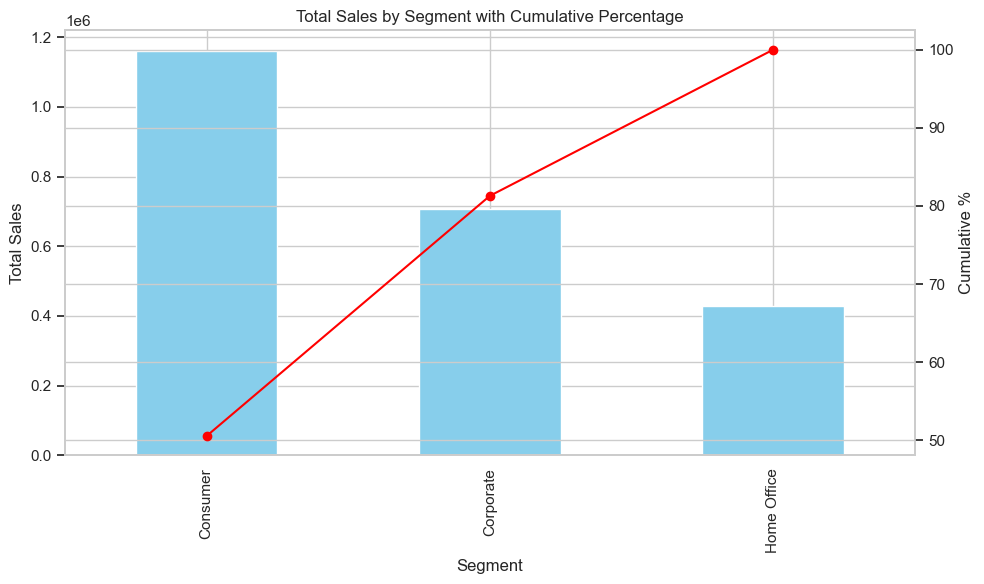

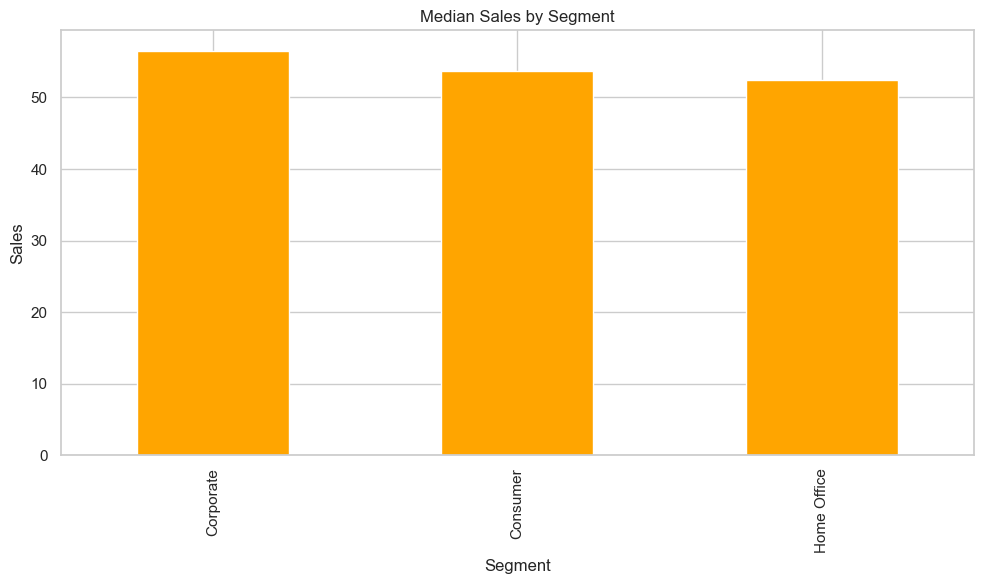

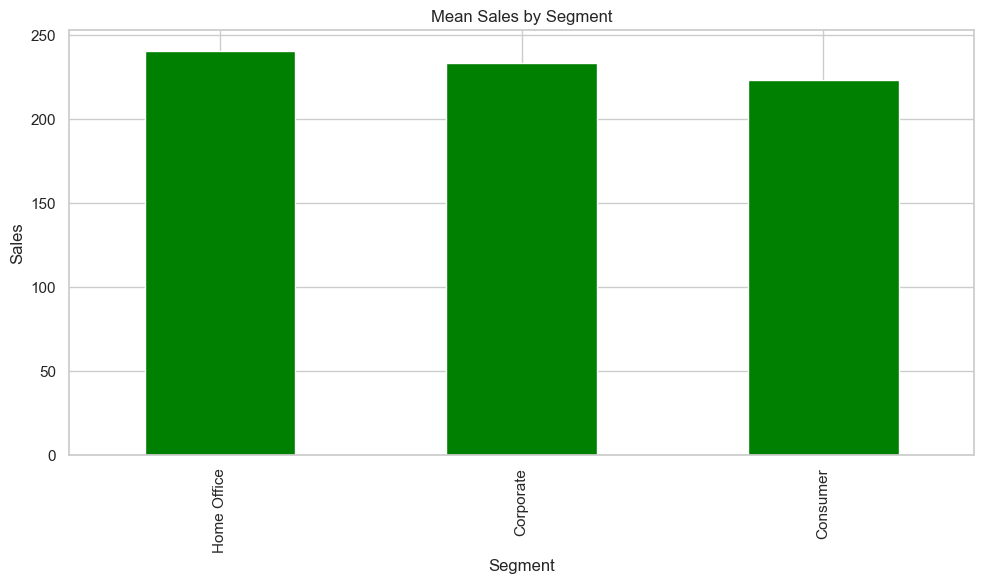

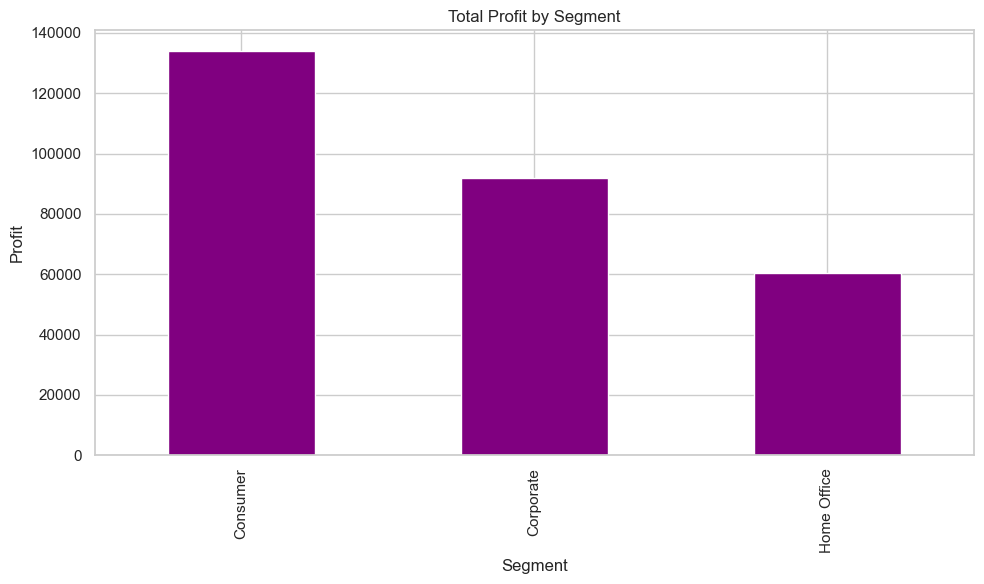

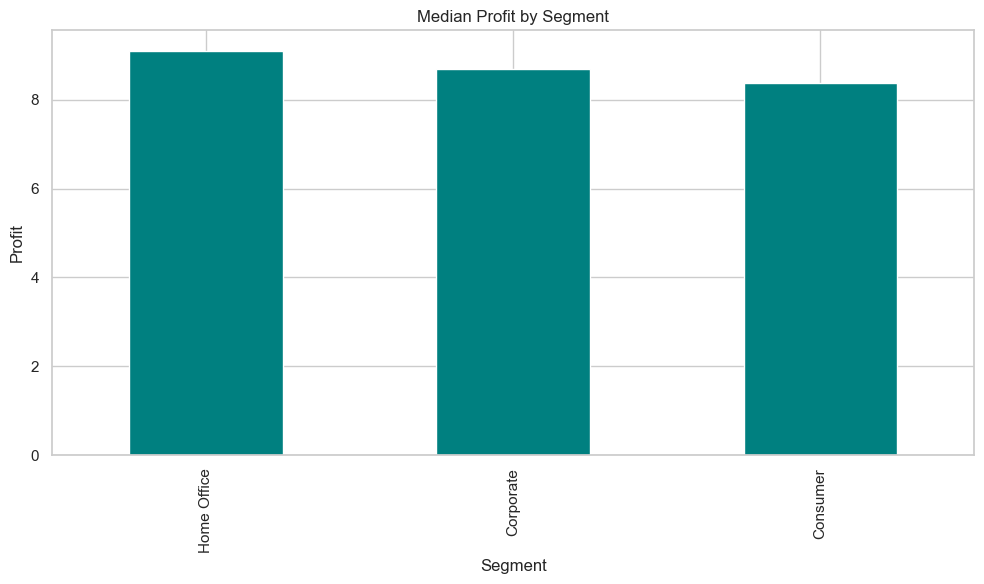

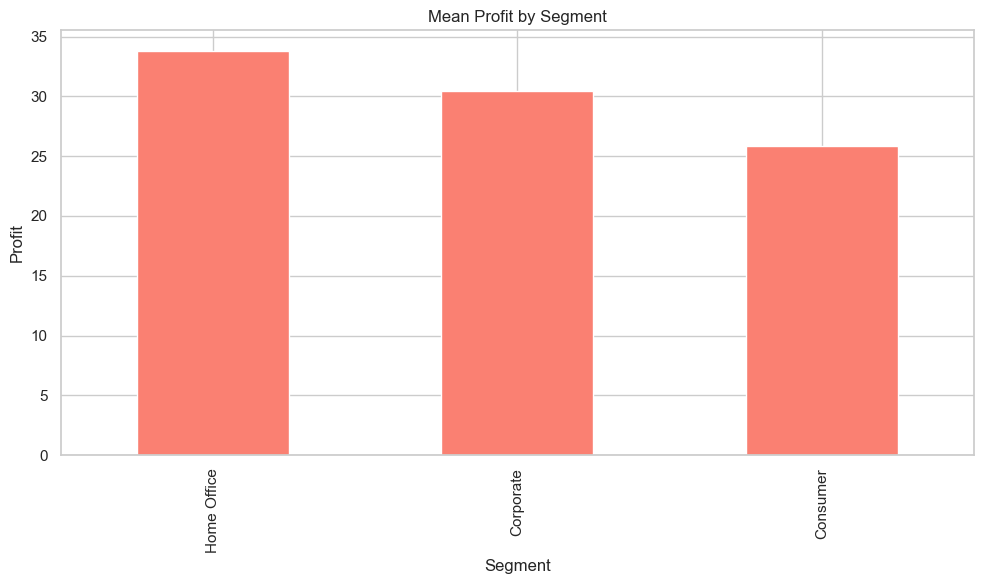

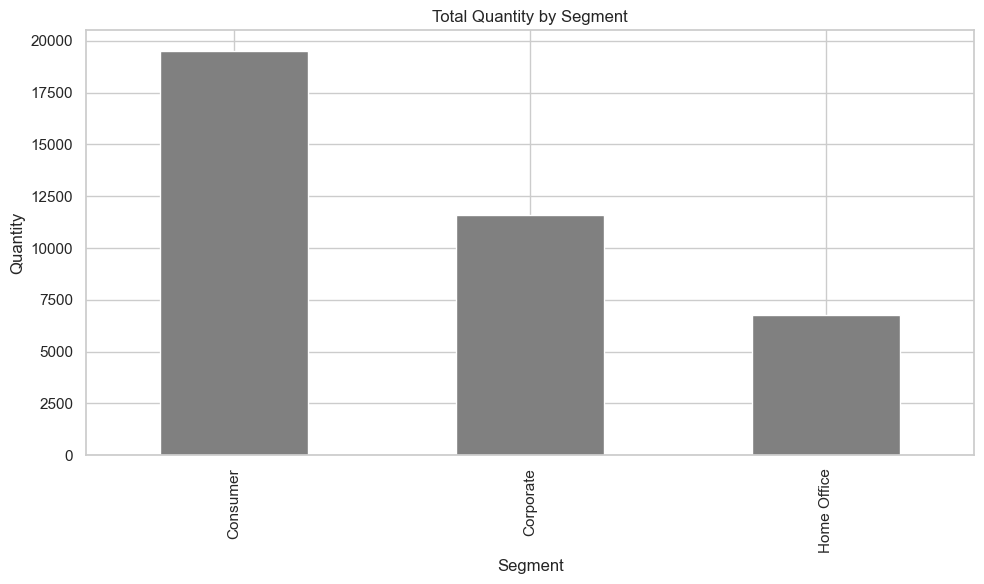

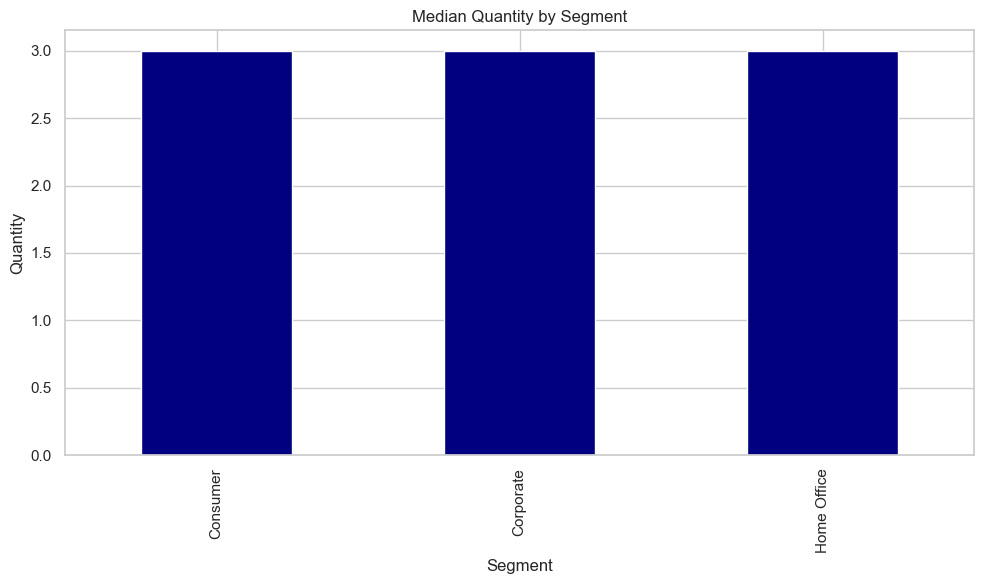

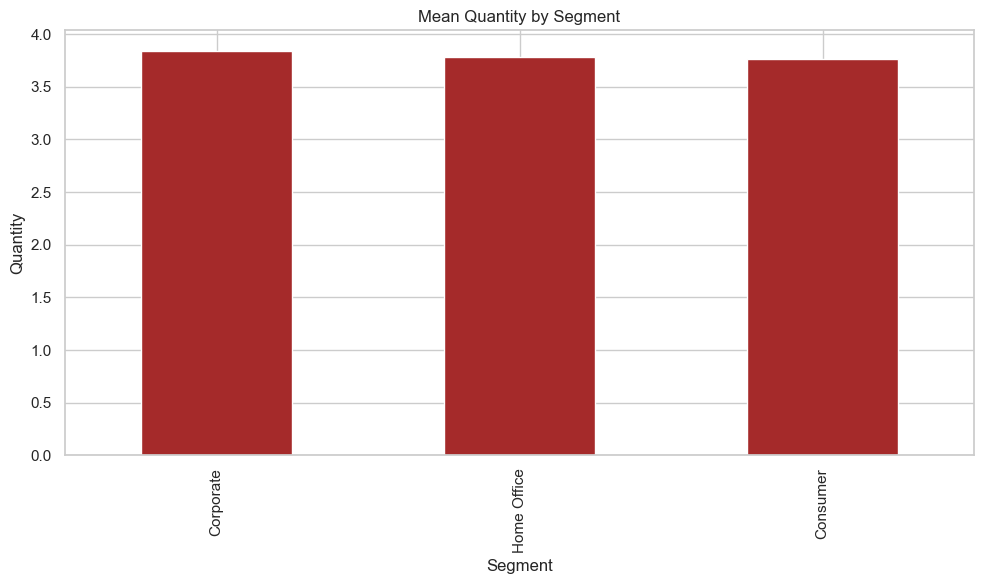

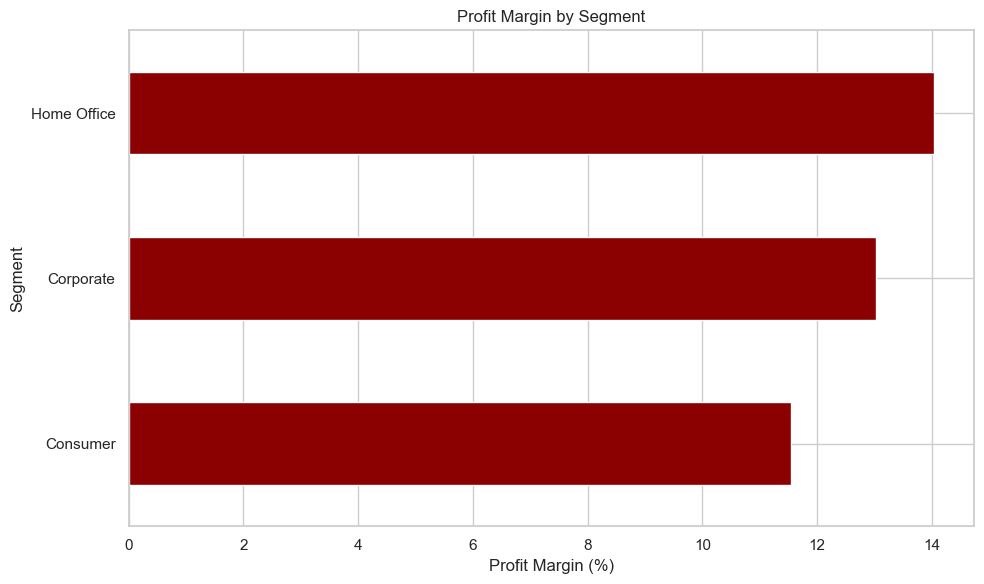

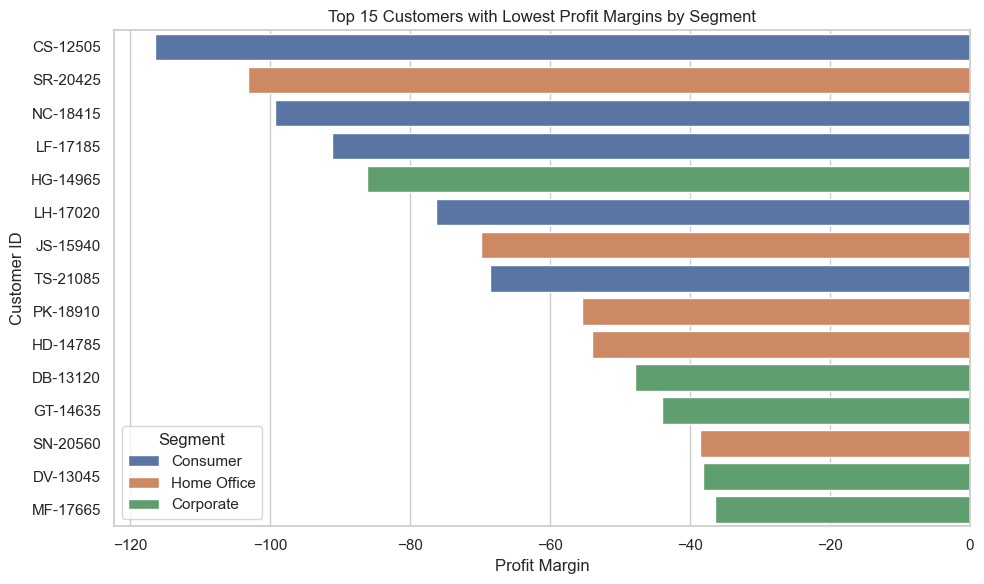

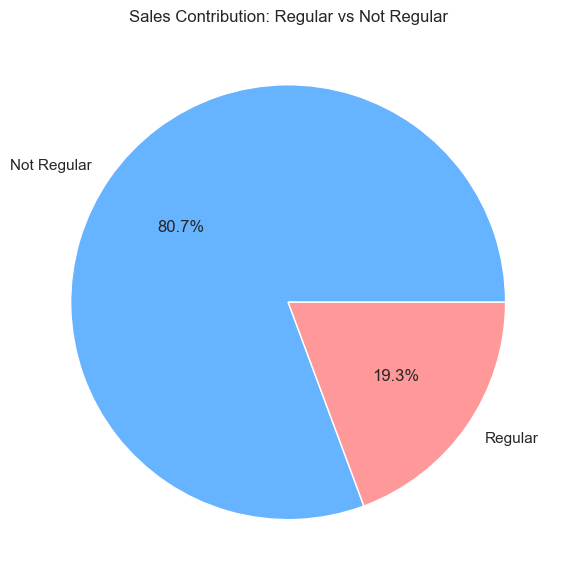

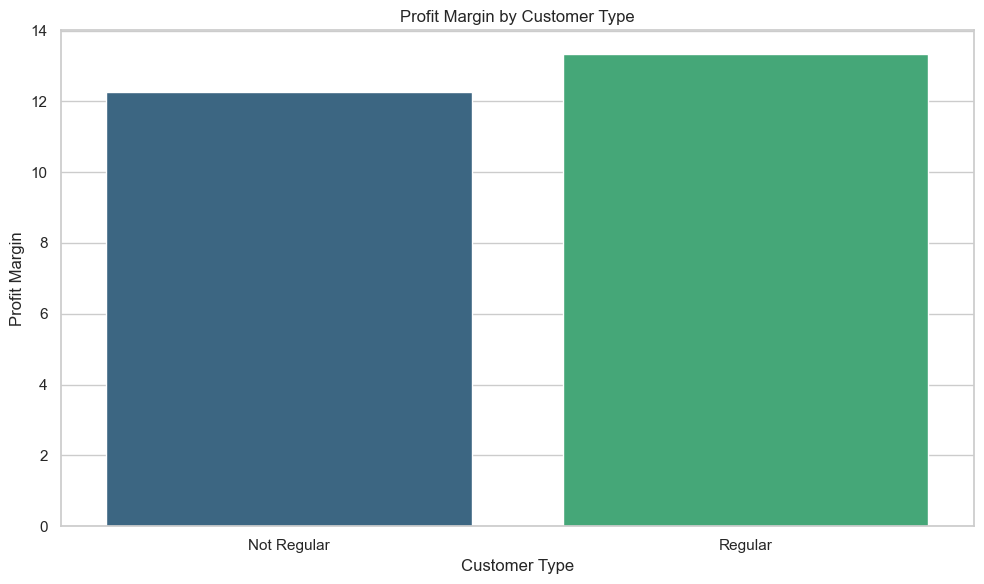

In [ ]:
# 0.6_Product_analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Segment-wise Sales Analysis 
sales_per_segment = data.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
sales_cumsum = sales_per_segment.cumsum()
sales_cumperc = sales_cumsum / sales_per_segment.sum() * 100

# Pareto Chart
fig, ax1 = plt.subplots()
sales_per_segment.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_ylabel("Total Sales")
ax2 = ax1.twinx()
sales_cumperc.plot(color='red', marker='o', ax=ax2)
ax2.set_ylabel("Cumulative %")
plt.title("Total Sales by Segment with Cumulative Percentage")
plt.tight_layout()
plt.show()

# Median & Mean Sales by Segment
median_sales = data.groupby('Segment')['Sales'].median().sort_values(ascending=False)
mean_sales = data.groupby('Segment')['Sales'].mean().sort_values(ascending=False)

median_sales.plot(kind='bar', color='orange')
plt.title("Median Sales by Segment")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

mean_sales.plot(kind='bar', color='green')
plt.title("Mean Sales by Segment")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

# Profit Analysis
total_profit = data.groupby('Segment')['Profit'].sum().sort_values(ascending=False)
median_profit = data.groupby('Segment')['Profit'].median().sort_values(ascending=False)
mean_profit = data.groupby('Segment')['Profit'].mean().sort_values(ascending=False)

total_profit.plot(kind='bar', color='purple')
plt.title("Total Profit by Segment")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

median_profit.plot(kind='bar', color='teal')
plt.title("Median Profit by Segment")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

mean_profit.plot(kind='bar', color='salmon')
plt.title("Mean Profit by Segment")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

# Quantity Analysis 
total_quantity = data.groupby('Segment')['Quantity'].sum().sort_values(ascending=False)
median_quantity = data.groupby('Segment')['Quantity'].median().sort_values(ascending=False)
mean_quantity = data.groupby('Segment')['Quantity'].mean().sort_values(ascending=False)

total_quantity.plot(kind='bar', color='gray')
plt.title("Total Quantity by Segment")
plt.ylabel("Quantity")
plt.tight_layout()
plt.show()

median_quantity.plot(kind='bar', color='navy')
plt.title("Median Quantity by Segment")
plt.ylabel("Quantity")
plt.tight_layout()
plt.show()

mean_quantity.plot(kind='bar', color='brown')
plt.title("Mean Quantity by Segment")
plt.ylabel("Quantity")
plt.tight_layout()
plt.show()

# Profit Margin by Segment 
margin_data = data.groupby('Segment')[['Sales', 'Profit']].sum()
margin_data['Profit Margin'] = (margin_data['Profit'] / margin_data['Sales']) * 100
margin_data['Profit Margin'].sort_values().plot(kind='barh', color='darkred')
plt.title("Profit Margin by Segment")
plt.xlabel("Profit Margin (%)")
plt.tight_layout()
plt.show()

# Top 15 Customers with Lowest Profit Margins by Segment 
segment_margin = data.groupby(['Segment', 'Customer ID'])[['Sales', 'Profit']].sum().reset_index()
segment_margin['Profit Margin'] = (segment_margin['Profit'] / segment_margin['Sales']) * 100
lowest_margins = segment_margin.sort_values('Profit Margin').groupby('Segment').head(5)

sns.barplot(data=lowest_margins, y='Customer ID', x='Profit Margin', hue='Segment')
plt.title("Top 15 Customers with Lowest Profit Margins by Segment")
plt.tight_layout()
plt.show()

# Regular vs Not Regular Customers 
customer_order_count = data.groupby('Customer ID')['Order ID'].nunique().reset_index()
customer_order_count['Customer Type'] = customer_order_count['Order ID'].apply(lambda x: 'Regular' if x >= 10 else 'Not Regular')

customer_sales_profit = data.groupby('Customer ID')[['Sales', 'Profit']].sum().reset_index()
customer_type = pd.merge(customer_order_count[['Customer ID', 'Customer Type']], customer_sales_profit, on='Customer ID')

type_summary = customer_type.groupby('Customer Type')[['Sales', 'Profit']].sum().reset_index()
type_summary['Profit Margin'] = (type_summary['Profit'] / type_summary['Sales']) * 100

# Pie chart for Sales contribution
plt.pie(type_summary['Sales'], labels=type_summary['Customer Type'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title("Sales Contribution: Regular vs Not Regular")
plt.tight_layout()
plt.show()

# Bar chart for Profit Margin — updated to fix FutureWarning
sns.barplot(data=type_summary, x='Customer Type', y='Profit Margin', hue='Customer Type', palette='viridis', legend=False)
plt.title("Profit Margin by Customer Type")
plt.tight_layout()
plt.show()

In [ ]:
# 0.7_Time_Series_Analysis 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# 1. Prepare time series data: aggregate sales and profit by order date
data_timeseries = data[['Order Date', 'Sales', 'Profit']].copy()
data_timeseries['Order Date'] = pd.to_datetime(data_timeseries['Order Date'])
data_timeseries = data_timeseries.groupby('Order Date', as_index=False).sum().sort_values('Order Date')

# Define colors for consistent use
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# 2. Sales Over Time with Range Slider
fig_sales = px.area(
    data_timeseries,
    x='Order Date',
    y='Sales',
    template='simple_white',
    color_discrete_sequence=[colors[0]],
    title="Sales over Time Period (2014-2018) with Range Slider and Selectors"
)
fig_sales.update_layout(
    yaxis_title="Sales",
    xaxis_title="Date",
    font=dict(size=13)
)
fig_sales.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=[
            dict(count=1, label="Last Month", step="month", stepmode="backward"),
            dict(count=6, label="Last 6 Months", step="month", stepmode="backward"),
            dict(count=1, label="Last Year", step="year", stepmode="backward"),
            dict(step="all")
        ]
    )
)
fig_sales.show()

# 3. Profit Over Time with Range Slider
fig_profit = px.area(
    data_timeseries,
    x='Order Date',
    y='Profit',
    template='simple_white',
    color_discrete_sequence=[colors[1]],
    title="Profit over Time Period (2014-2018) with Range Slider and Selectors"
)
fig_profit.update_layout(
    yaxis_title="Profit",
    xaxis_title="Date",
    font=dict(size=13)
)
fig_profit.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=[
            dict(count=1, label="Last Month", step="month", stepmode="backward"),
            dict(count=6, label="Last 6 Months", step="month", stepmode="backward"),
            dict(count=1, label="Last Year", step="year", stepmode="backward"),
            dict(step="all")
        ]
    )
)
fig_profit.show()

# 4. Sales & Profit Scatter with Profitability Indication
data_timeseries['Profitable'] = (data_timeseries['Profit'] / data_timeseries['Profit'].abs()).fillna(0).astype(int)
fig_scatter = go.Figure(go.Scatter(
    x=data_timeseries['Order Date'],
    y=data_timeseries['Profit'],
    mode='markers',
    marker=dict(
        size=data_timeseries['Sales'] / 500,
        color=data_timeseries['Profitable'],
        colorscale=['red', 'green'],
        showscale=False
    )
))
fig_scatter.update_layout(
    title="Sales & Profit over Time Period (2014-2018)",
    xaxis_title="Date",
    yaxis_title="Profit",
    font=dict(size=14),
    showlegend=False,
    template='simple_white'
)
fig_scatter.show()

# 5. Shipping Time Analysis
data_shipping = data.copy()
data_shipping['Shipping Time'] = (pd.to_datetime(data_shipping['Ship Date']) - pd.to_datetime(data_shipping['Order Date'])).dt.days

# Average Delivery Time by Shipping Mode
ship_mode_avg = data_shipping.groupby('Ship Mode', as_index=False)['Shipping Time'].mean()

fig_ship_mode = px.bar(
    ship_mode_avg,
    x='Ship Mode',
    y='Shipping Time',
    color='Ship Mode',
    template='simple_white',
    color_discrete_sequence=['#1192AA','#000000','#00B8C0', '#73D4D3'],
    title="Average Delivery Time by Shipping Mode (days)"
)
fig_ship_mode.update_layout(
    xaxis_title="Shipping Mode",
    yaxis_title="Number of Days",
    font=dict(size=14),
    showlegend=True
)
fig_ship_mode.show()

# Total Sales by Average Delivery Time
sales_by_ship_time = data_shipping.groupby('Shipping Time', as_index=False)['Sales'].sum().sort_values('Sales')

fig_sales_ship_time = px.bar(
    sales_by_ship_time,
    x='Sales',
    y='Shipping Time',
    orientation='h',
    template='simple_white',
    color_discrete_sequence=[colors[0]],
    title="Total Sales by Average Delivery Time (days)"
)
fig_sales_ship_time.update_layout(
    xaxis_title="Total Sales",
    yaxis_title="Number of Days",
    font=dict(size=14),
    showlegend=False
)
fig_sales_ship_time.show()

# Total Profit by Average Delivery Time
profit_by_ship_time = data_shipping.groupby('Shipping Time', as_index=False)['Profit'].sum().sort_values('Profit')

fig_profit_ship_time = px.bar(
    profit_by_ship_time,
    x='Profit',
    y='Shipping Time',
    orientation='h',
    template='simple_white',
    color_discrete_sequence=[colors[1]],
    title="Total Profit by Average Delivery Time (days)"
)
fig_profit_ship_time.update_layout(
    xaxis_title="Total Profit",
    yaxis_title="Number of Days",
    font=dict(size=14),
    showlegend=False
)
fig_profit_ship_time.show()

# Profit Margin by Average Delivery Time
margin_by_ship_time = data_shipping.groupby('Shipping Time', as_index=False).sum()
margin_by_ship_time['Profit Margin'] = (margin_by_ship_time['Profit'] / margin_by_ship_time['Sales']) * 100

fig_margin_ship_time = px.bar(
    margin_by_ship_time,
    x='Profit Margin',
    y='Shipping Time',
    orientation='h',
    template='simple_white',
    color_discrete_sequence=[colors[2]],
    title="Profit Margin by Average Delivery Time"
)
fig_margin_ship_time.update_layout(
    xaxis_title="Profit Margin (%)",
    yaxis_title="Number of Days",
    font=dict(size=14),
    showlegend=False
)
fig_margin_ship_time.show()

In [ ]:
# 0.8_Discount_analysis 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Define color palette
colors = ['#796AAE', '#1192AA', '#FF6F61', '#00B8C0', '#1192AA']

# Manual mapping: full state names to USPS abbreviations (for continental USA)
state_to_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Step 1: Data Preparation
orders = data.copy()
orders['With Discount'] = orders['Discount'].apply(lambda x: 'With Discount' if x > 0 else 'Without Discount')
orders['State_abb'] = orders['State'].map(state_to_abbr)

# Step 2: Core Visualizations

## Chart 1: Number of Orders by Discount Status
discount_counts = orders['With Discount'].value_counts()
fig1 = px.bar(
    x=discount_counts.index,
    y=discount_counts.values,
    labels={'x': 'Discount Status', 'y': 'Number of Orders'},
    title='Number of Orders by Discount Status',
    color=discount_counts.index,
    color_discrete_map={'With Discount': colors[0], 'Without Discount': colors[1]}
)
fig1.update_layout(showlegend=False, font=dict(size=14))
fig1.show()

## Chart 2: Orders by Discount Status and Product Category
cat_discount_counts = orders.groupby(['Category', 'With Discount']).size().reset_index(name='Counts')
fig2 = px.bar(
    cat_discount_counts,
    x='Category',
    y='Counts',
    color='With Discount',
    barmode='group',
    title='Orders by Discount Status and Product Category',
    color_discrete_map={'With Discount': colors[0], 'Without Discount': colors[1]}
)
fig2.update_layout(font=dict(size=14))
fig2.show()

## Chart 3: Orders by Discount Status and Region
region_discount_counts = orders.groupby(['Region', 'With Discount']).size().reset_index(name='Counts')
fig3 = px.bar(
    region_discount_counts,
    x='Region',
    y='Counts',
    color='With Discount',
    barmode='group',
    title='Orders by Discount Status and Region',
    color_discrete_map={'With Discount': colors[0], 'Without Discount': colors[1]}
)
fig3.update_layout(font=dict(size=14))
fig3.show()

# Step 3: Sales & Profit Summaries

## Total Sales by Discount Status
sales_summary = orders.groupby('With Discount')['Sales'].sum().reset_index()
fig_sales = go.Figure(go.Pie(
    labels=sales_summary['With Discount'],
    values=sales_summary['Sales'],
    hole=0.4,
    marker=dict(colors=[colors[0], colors[1]], line=dict(color='black', width=1))
))
fig_sales.update_layout(title='Total Sales by Discount Status', font=dict(size=14))
fig_sales.show()

## Mean Sales by Discount Status
mean_sales = orders.groupby('With Discount')['Sales'].mean().reset_index()
fig_mean_sales = px.bar(
    mean_sales,
    x='With Discount',
    y='Sales',
    color='With Discount',
    color_discrete_map={'With Discount': colors[0], 'Without Discount': colors[1]},
    title='Mean Sales by Discount Status'
)
fig_mean_sales.update_layout(showlegend=False, font=dict(size=14))
fig_mean_sales.show()

## Total Profit by Discount Status
profit_summary = orders.groupby('With Discount')['Profit'].sum().reset_index()
fig_profit = px.bar(
    profit_summary,
    x='With Discount',
    y='Profit',
    color='With Discount',
    color_discrete_map={'With Discount': 'hotpink', 'Without Discount': colors[0]},
    title='Total Profit by Discount Status'
)
fig_profit.update_layout(showlegend=False, font=dict(size=14))
fig_profit.show()

## Mean Profit by Discount Status
mean_profit = orders.groupby('With Discount')['Profit'].mean().reset_index()
fig_mean_profit = px.bar(
    mean_profit,
    x='With Discount',
    y='Profit',
    color='With Discount',
    color_discrete_map={'With Discount': 'hotpink', 'Without Discount': colors[1]},
    title='Mean Profit by Discount Status'
)
fig_mean_profit.update_layout(showlegend=False, font=dict(size=14))
fig_mean_profit.show()

## Profit Margin by Discount Status
profit_margin = orders.groupby('With Discount').agg({'Profit':'sum', 'Sales':'sum'}).reset_index()
profit_margin['Profit Margin (%)'] = (profit_margin['Profit'] / profit_margin['Sales']) * 100
fig_profit_margin = px.bar(
    profit_margin,
    x='With Discount',
    y='Profit Margin (%)',
    color='With Discount',
    color_discrete_map={'With Discount': 'hotpink', 'Without Discount': colors[2]},
    title='Profit Margin by Discount Status'
)
fig_profit_margin.update_layout(showlegend=False, font=dict(size=14))
fig_profit_margin.show()

# Step 4: Frequency Histograms by Categories and Discount Status
category_columns = ['Ship Mode', 'Segment', 'Category', 'Sub-Category', 'Region']
for col in category_columns:
    fig = px.histogram(
        orders,
        x=col,
        color='With Discount',
        barmode='group',
        color_discrete_map={'With Discount': colors[3], 'Without Discount': colors[1]},
        title=f"Frequency of Orders by {col} and Discount Status"
    )
    fig.update_traces(marker_line_color='black', marker_line_width=0.5)
    fig.update_layout(font=dict(size=14), bargroupgap=0.1)
    fig.show()

# Step 5: Geographic Analysis by Discount Status and State (using mapped abbreviations)
geo_pivot = orders.pivot_table(
    index='State_abb',
    columns='With Discount',
    aggfunc='size',
    fill_value=0
).reset_index()

fig_geo = go.Figure()

scale_factor = 2  # Adjust marker size scaling as appropriate

if 'With Discount' in geo_pivot.columns:
    fig_geo.add_trace(go.Scattergeo(
        locations=geo_pivot['State_abb'],
        locationmode='USA-states',
        marker=dict(
            size=geo_pivot['With Discount'] * scale_factor,
            color=colors[0],
            sizemode='area',
            line=dict(width=0.5, color='black'),
            opacity=0.7
        ),
        name='With Discount'
    ))

if 'Without Discount' in geo_pivot.columns:
    fig_geo.add_trace(go.Scattergeo(
        locations=geo_pivot['State_abb'],
        locationmode='USA-states',
        marker=dict(
            size=geo_pivot['Without Discount'] * scale_factor,
            color=colors[1],
            sizemode='area',
            line=dict(width=0.5, color='black'),
            opacity=0.7
        ),
        name='Without Discount'
    ))

fig_geo.update_layout(
    title='Number of Orders by Discount Status and State',
    geo=dict(scope='usa', landcolor='rgb(217, 217, 217)'),
    font=dict(size=14)
)
fig_geo.show()